<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_CNN_Classification_v2_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

#https://medium.com/swlh/keras-imagedatagenerators-flow-methods-and-when-to-use-them-b9314489d591

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from keras import regularizers, optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.optimizers import Adam

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

num_classes = 10

#train_labels = to_categorical(train_labels, num_classes)
#test_labels = to_categorical(test_labels, num_classes)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. Your task will be predicting image classes.


# Tasks

In [6]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [7]:
train_labels[0,0]

0.0

In [8]:
np.unique(train_labels[:,:]),np.unique(test_labels[:,:])

(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))

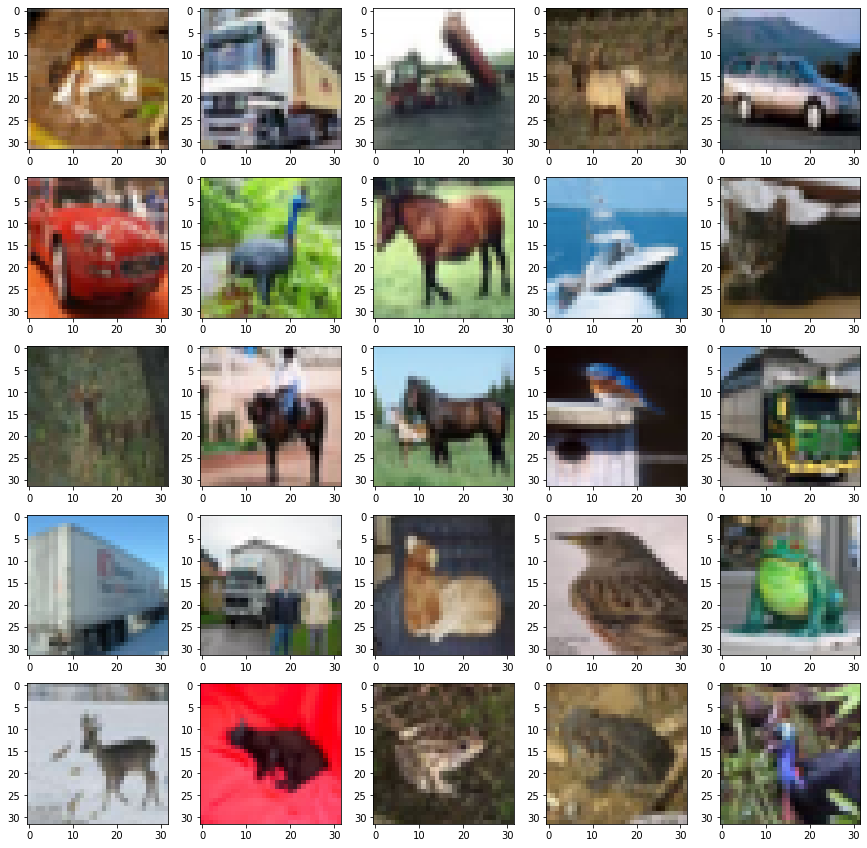

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(train_images[i])

plt.show()

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [12]:
"""
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()
"""

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))\nmodel.add(Activation('relu'))\n\nmodel.add(Conv2D(32, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (3, 3), padding='same'))\nmodel.add(Activation('relu'))\n\nmodel.add(Conv2D(64, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\n\nmodel.add(Dense(512))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(10, activation='softmax'))\nmodel.summary()\n"

Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128) 
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [13]:
train_images.shape[1]

32

In [14]:

learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and choose an appropriate metric for classification. Use 10 epochs to train the model.

In [15]:
model.compile(loss='categorical_crossentropy',optimizer=optim,metrics=['acc'])

#model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow(train_images,train_labels,batch_size=32,shuffle=True,seed=42,subset='training')#class model binary ?
valid_generator = datagen.flow(train_images,train_labels,batch_size=32,shuffle=True,seed=42,subset='validation')
test_generator = datagen_test.flow(test_images,test_labels,batch_size=32,seed=42)   

# work

In [17]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST

(1250, 312, 312)

In [18]:

history = model.fit(train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data = valid_generator,
                              validation_steps = STEP_SIZE_TEST,
                              epochs=10)

Epoch 1/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.8292 - acc: 0.3146 - val_loss: 1.2650 - val_acc: 0.5424
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.2338 - acc: 0.5602 - val_loss: 1.0761 - val_acc: 0.6217
Epoch 3/10
1250/1250 [==============================] - 63s 51ms/step - loss: 1.0505 - acc: 0.6332 - val_loss: 1.0059 - val_acc: 0.6467
Epoch 4/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.9110 - acc: 0.6811 - val_loss: 0.9522 - val_acc: 0.6709
Epoch 5/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.8241 - acc: 0.7141 - val_loss: 0.8897 - val_acc: 0.6925
Epoch 6/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.7464 - acc: 0.7409 - val_loss: 0.8484 - val_acc: 0.7093
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.6905 - acc: 0.7602 - val_loss: 0.8802 - val_acc: 0.6974
Epoch 8/10
1250/1250 [==========================

Evaluate the model on test data to get the loss and accuracy metrics

In [19]:
model.evaluate(test_generator)


313/313 [==============================] - 5s 15ms/step - loss: 0.8957 - acc: 0.7111


[0.8957470655441284, 0.7110999822616577]

# The End 